## Principal Component Analysis
##### Task 1: Exploratory Data Analysis (EDA):

1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.
    
##### Task 2: Dimensionality Reduction with PCA:

1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.

##### Task 3: Clustering with Original Data:

1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

##### Task 4: Clustering with PCA Data:

1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

##### Task 5: Comparison and Analysis:

1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

##### Task 6: Conclusion and Insights:

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load dataset
wine_df = pd.read_csv('wine.csv')
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Exploratory Data Analysis (EDA)

In [3]:
wine_df.shape

(178, 14)

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
# Statistical Summary
wine_df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# Check for Duplicates
if(wine_df.duplicated().sum() != 0):
    print("DUPLICATES ARE PRESENT")
    print("No.of duplicated rows: ",wine_df.duplicated().sum())
    # Print duplicated values
    wine_df[wine_df.duplicated(keep = False)]
else:
    print("NO DUPLICATES")

NO DUPLICATES


In [7]:
# Missing values
wine_df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

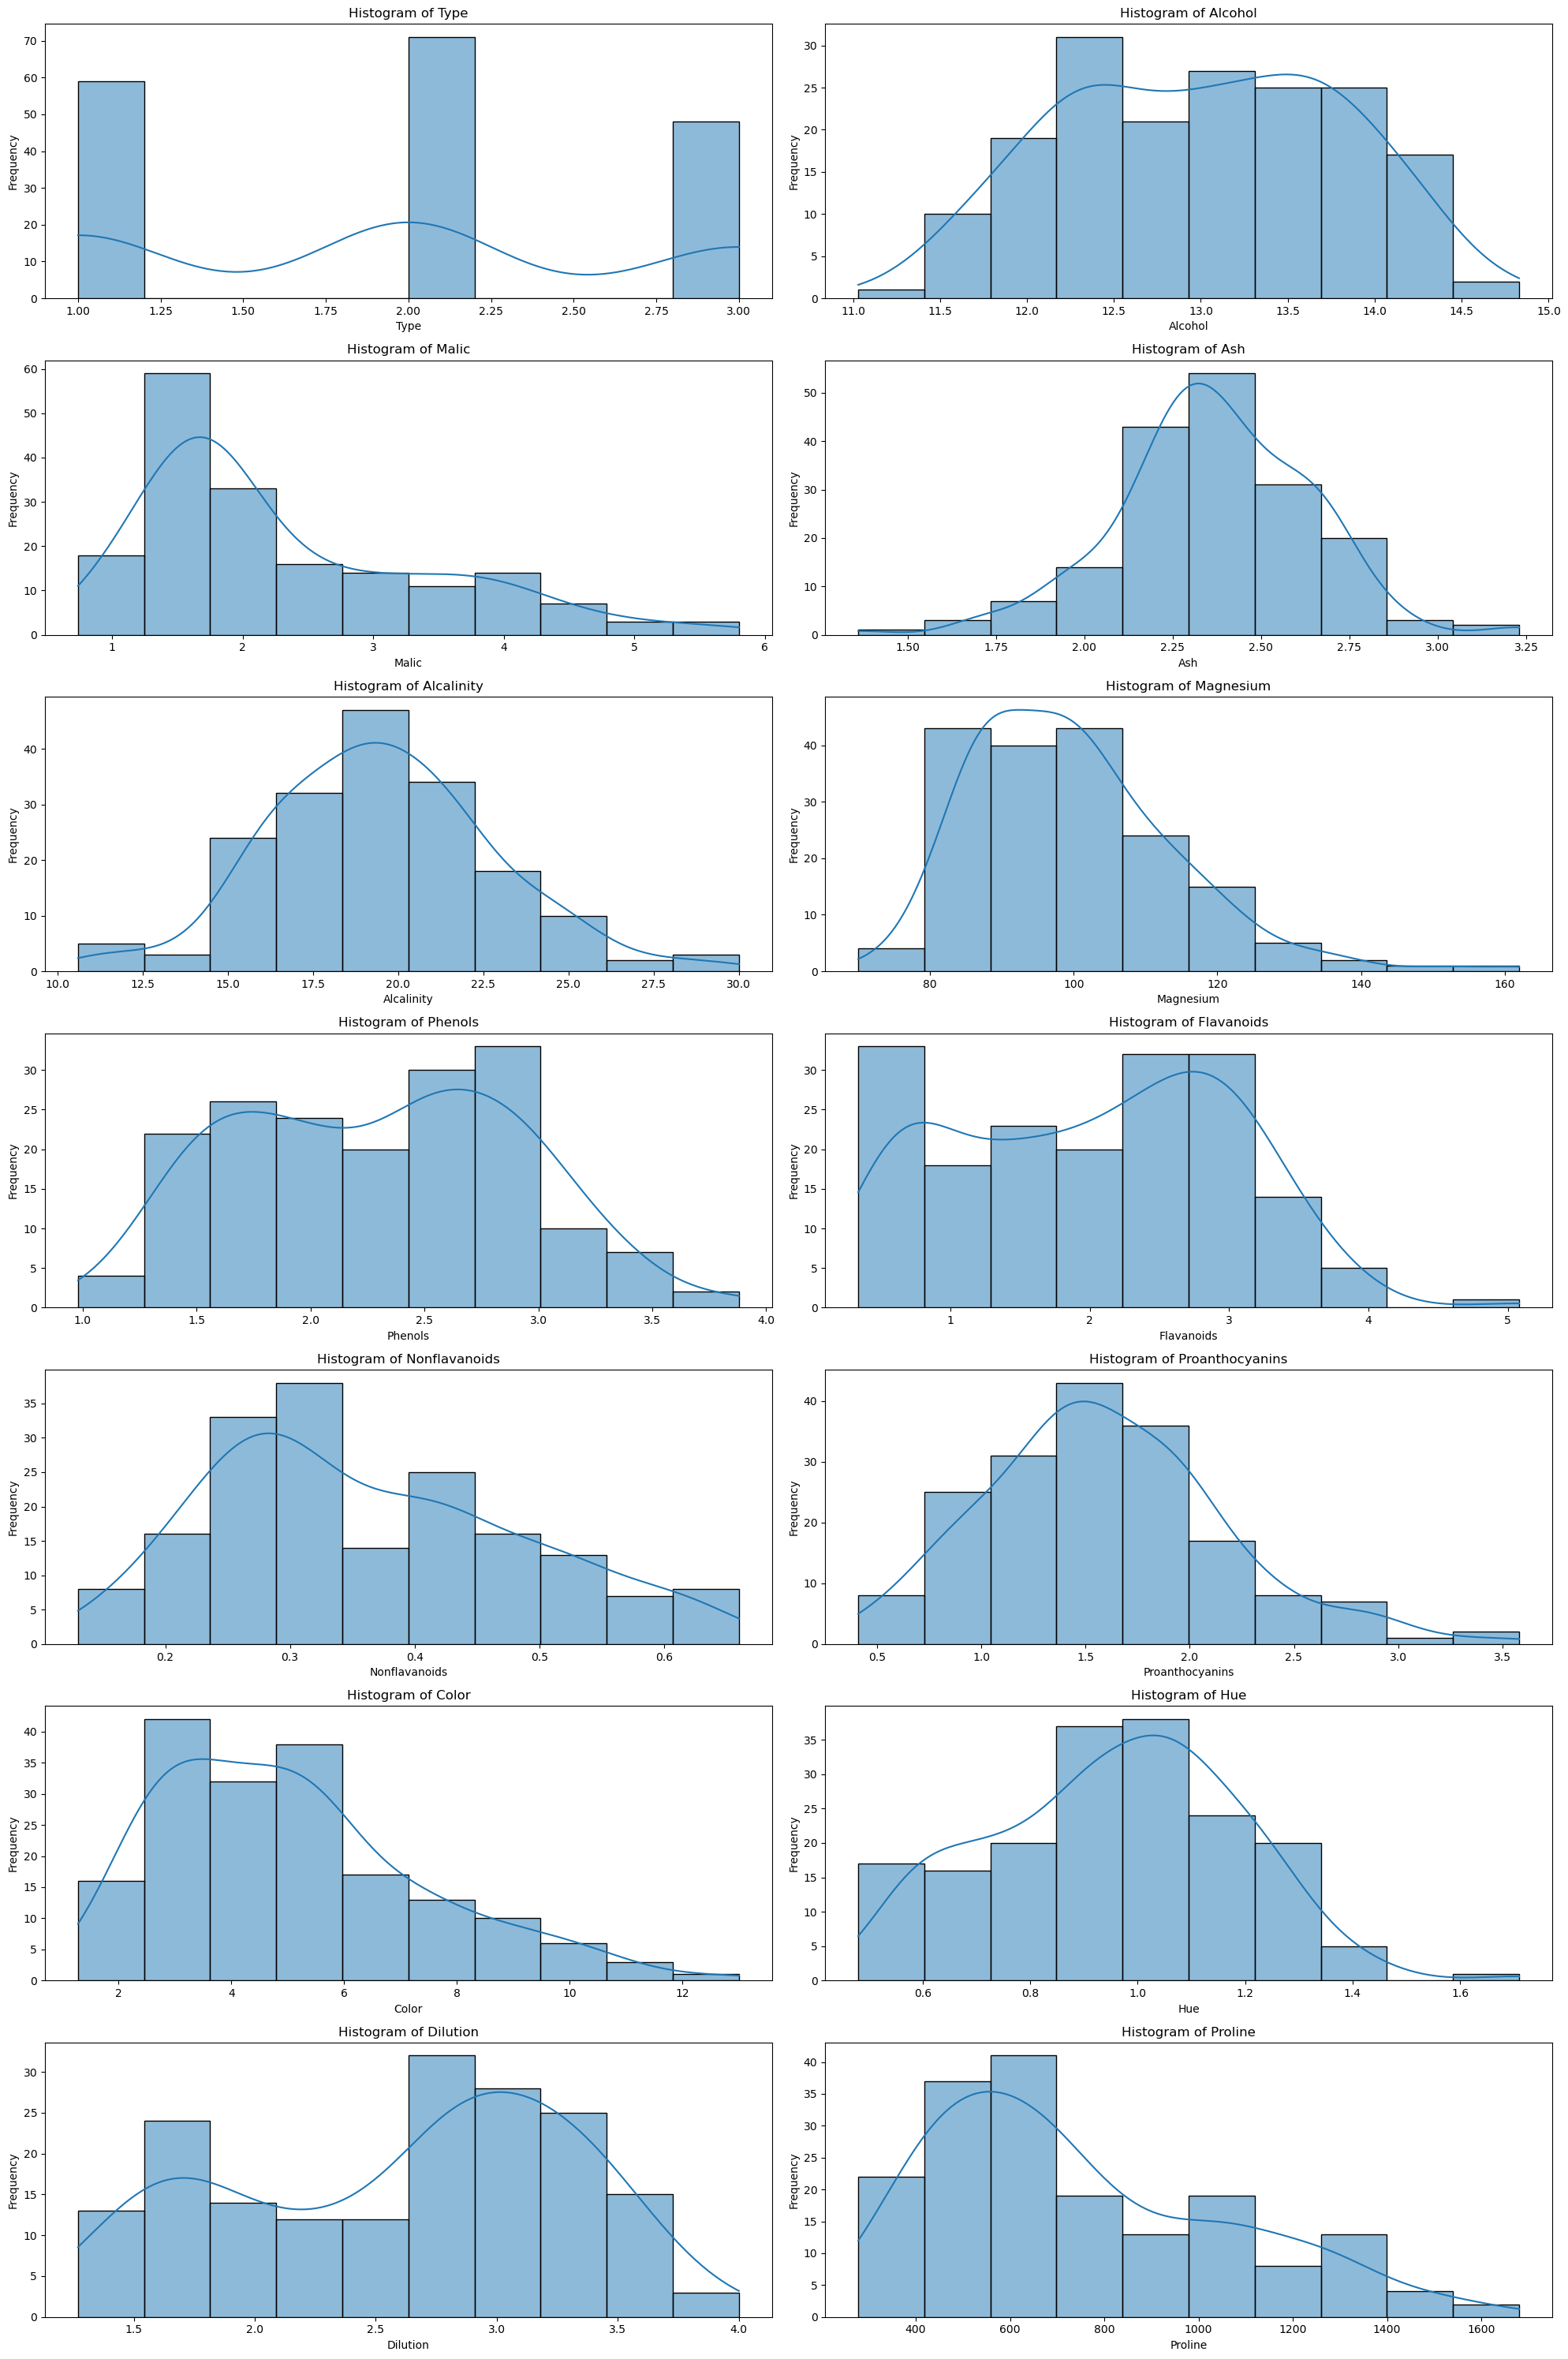

In [8]:
# HISTOGRAM
plt.figure(figsize = (20,30))
for i, column in enumerate( wine_df,1):
    plt.subplot(7,2,i)
    sns.histplot(wine_df[column], bins = 10, kde = True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

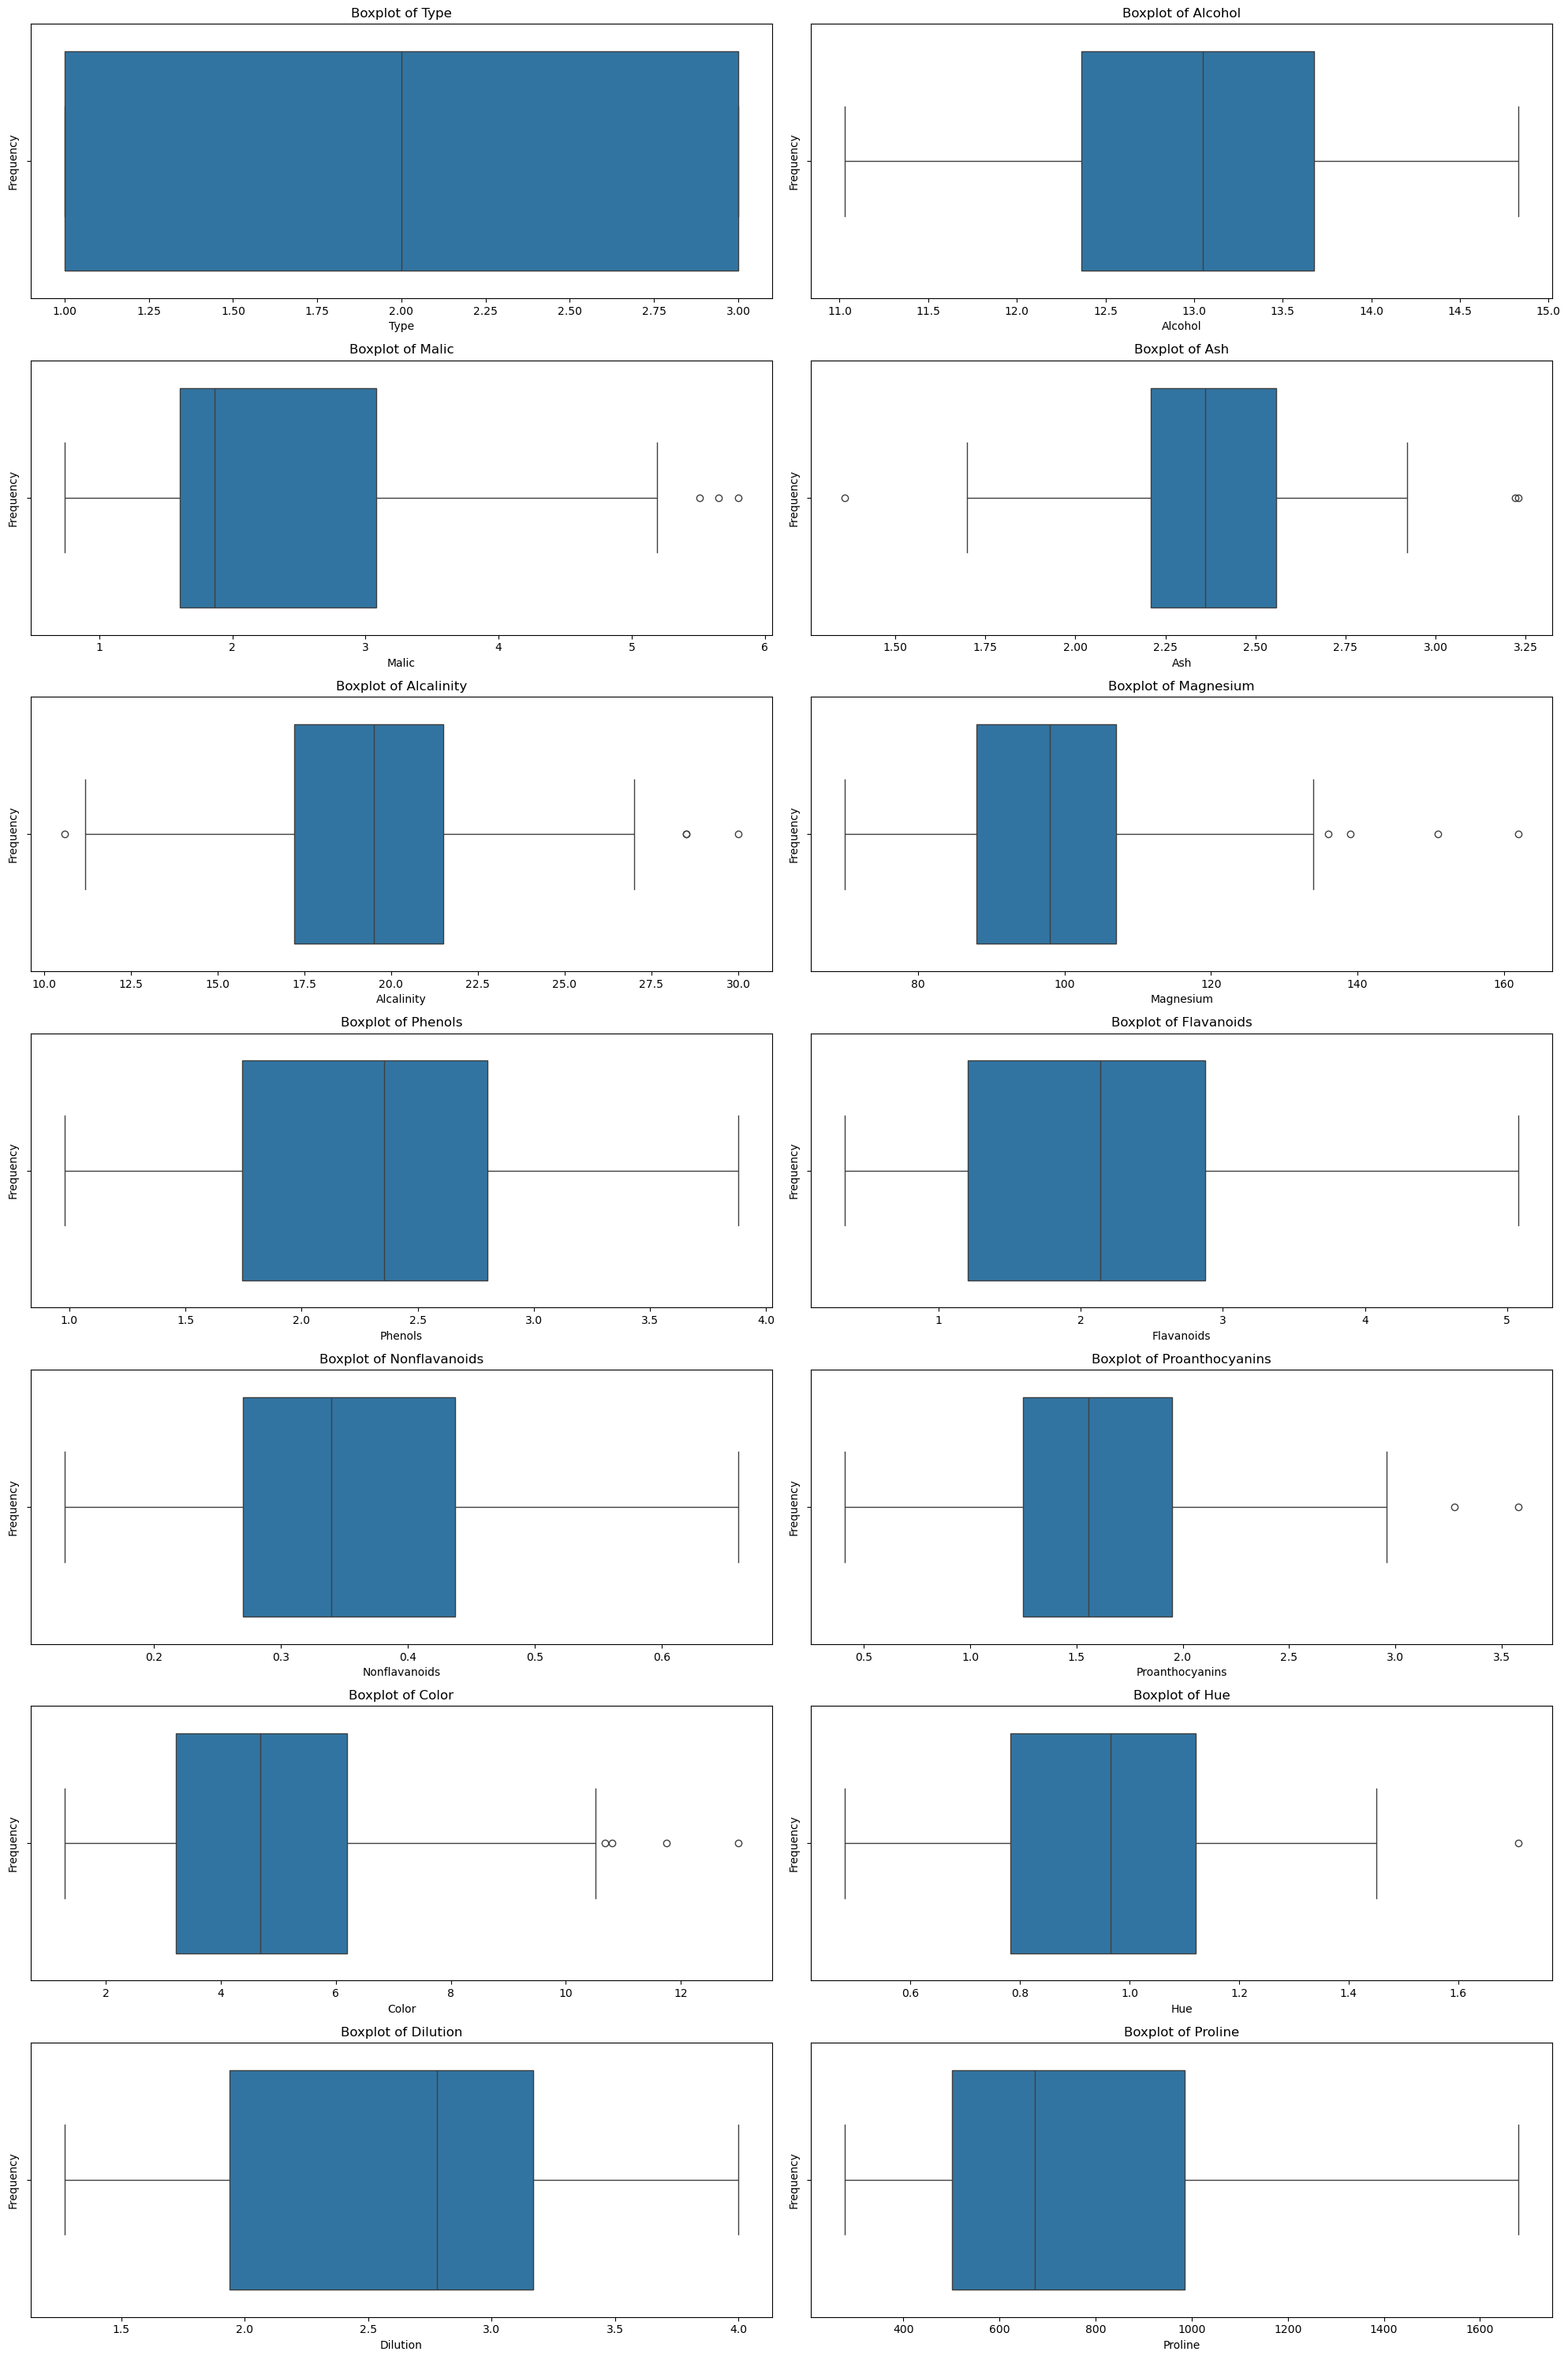

In [9]:
# BOXPLOT
plt.figure(figsize = (20,30))
for i, column in enumerate( wine_df,1):
    plt.subplot(7,2,i)
    sns.boxplot(x = wine_df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
# Correlation Matrix
corr_mat = wine_df.corr()
corr_mat

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


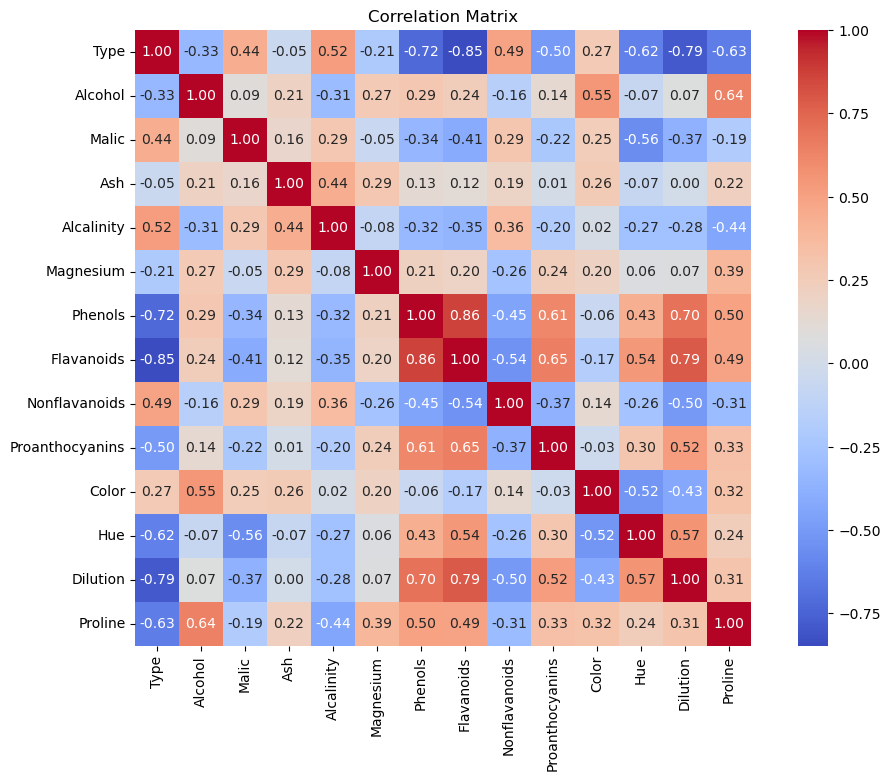

In [11]:
# Visualising in a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".2f", square = True)
plt.title("Correlation Matrix")
plt.show()

### Dimensionality Reduction with PCA

In [12]:
# Seperate features and target
X = wine_df.drop(columns = ['Type'])
Y = wine_df['Type']
X

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [14]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [15]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)

In [16]:
X_pca.iloc[:,0:13].var()

0     4.732437
1     2.511081
2     1.454242
3     0.924166
4     0.858049
5     0.645282
6     0.554141
7     0.350466
8     0.290512
9     0.252320
10    0.227064
11    0.169724
12    0.103962
dtype: float64

In [17]:
# The amount of variance that each PCA explains is
pca.explained_variance_ 

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [18]:
# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:\n",explained_variance_ratio)
# Cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nCumulative Variance:\n", cumulative_variance)

Explained Variance Ratio:
 [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]

Cumulative Variance:
 [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


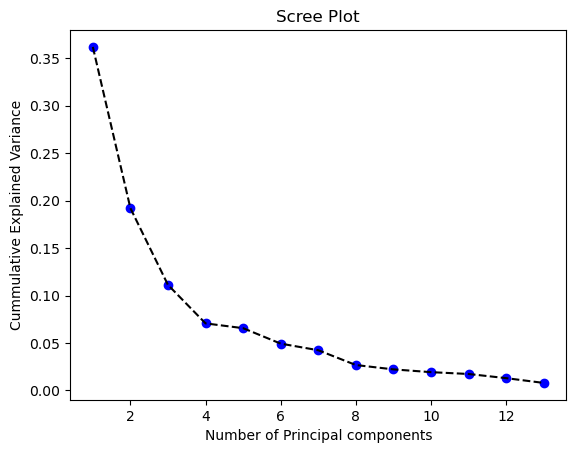

In [19]:
# Scree Plot
plt.plot(range(1,len(explained_variance_ratio)+1), explained_variance_ratio, color = 'black', linestyle = '--')
plt.scatter(range(1,len(explained_variance_ratio)+1), explained_variance_ratio, color = 'blue')
plt.title("Scree Plot")
plt.xlabel("Number of Principal components")
plt.ylabel("Cummulative Explained Variance")
plt.show()

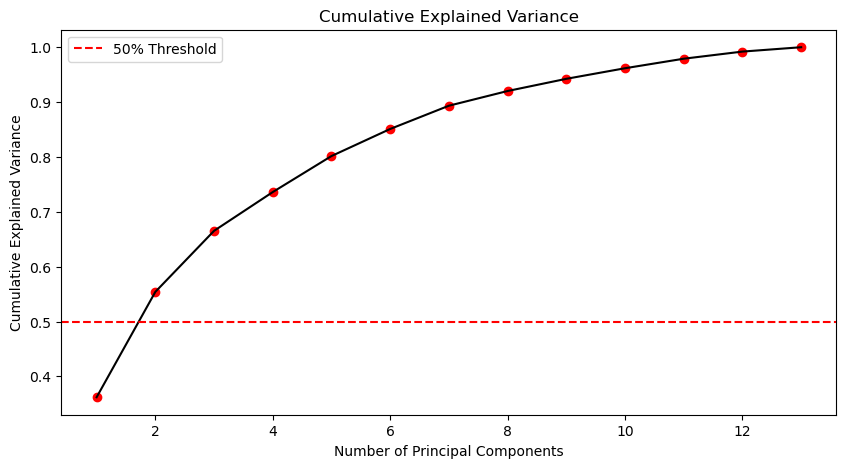

In [20]:
# Cumulative explained variance plot
plt.figure(figsize=(10, 5))
plt.scatter(range(1, len(cumulative_variance) + 1), cumulative_variance, color='red')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='black')
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Threshold')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.show()

In [21]:
# selecting components explaining 50% variance
n_components = np.argmax(cumulative_variance >= 0.5) + 1
print(f"Number of principal components selected (50% variance): {n_components}")

Number of principal components selected (50% variance): 2


### Clustering with Original Data

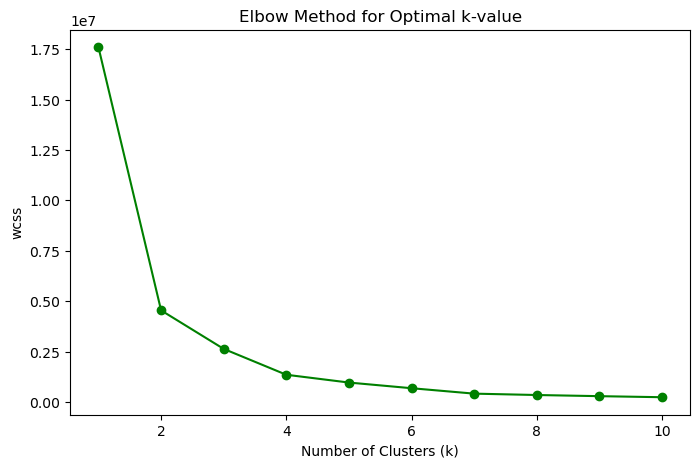

In [22]:
# K-Means Clustering
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize = (8,5))
plt.plot(k_range, wcss, color = 'green', marker = 'o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("wcss")
plt.title("Elbow Method for Optimal k-value")
plt.show()

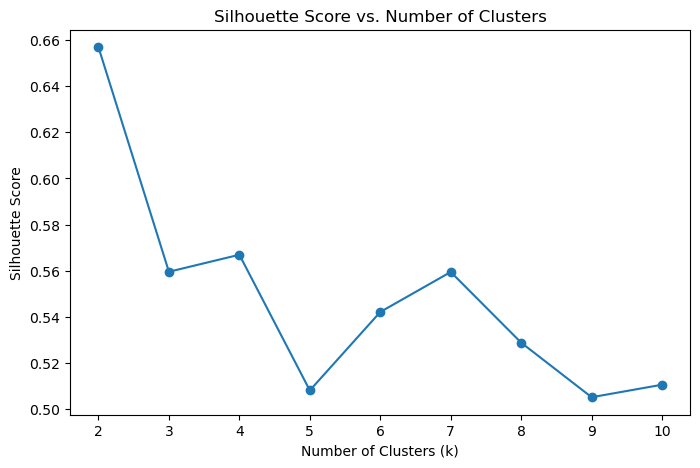

In [23]:
# Silhouette Score
from sklearn.metrics import silhouette_score
sil_score = []
k_range = range(2,11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    label = kmeans.fit_predict(X)
    score = silhouette_score(X, label)
    sil_score.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_score, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

Silhouette score is maximum for k=3

In [24]:
# Apply KMeans with chosen k
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42, max_iter = 300)
kmeans.fit(X)
kmeans.cluster_centers_

array([[1.25985294e+01, 2.45343137e+00, 2.32186275e+00, 2.06460784e+01,
        9.36960784e+01, 2.05362745e+00, 1.64754902e+00, 3.95980392e-01,
        1.42509804e+00, 4.67333332e+00, 9.17843137e-01, 2.39480392e+00,
        5.21558824e+02],
       [1.33691837e+01, 2.40000000e+00, 2.39265306e+00, 1.85142857e+01,
        1.09081633e+02, 2.44163265e+00, 2.21367347e+00, 3.25510204e-01,
        1.70673469e+00, 5.18836735e+00, 9.59714286e-01, 2.84795918e+00,
        9.06346939e+02],
       [1.38507407e+01, 1.77851852e+00, 2.48777778e+00, 1.69259259e+01,
        1.05629630e+02, 2.94148148e+00, 3.13666667e+00, 2.98888889e-01,
        2.00703704e+00, 6.27518519e+00, 1.10296296e+00, 3.00222222e+00,
        1.30877778e+03]])

In [25]:
label = kmeans.labels_
label

array([1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0])

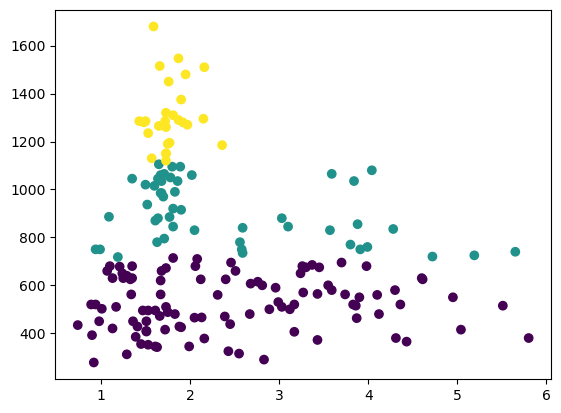

In [26]:
plt.scatter(X['Malic'], X['Proline'],c = label)

In [28]:
# Silhouette score

silhouette = silhouette_score(X, label)
print(f"Silhouette Score: {silhouette:.3f}")

Silhouette Score: 0.560


### Clustering with PCA

In [29]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [30]:
X = X_pca.iloc[:,0:2]
X.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [31]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=3,init='k-means++')
Kmeans.fit(X)

KMeans(n_clusters=3)

In [32]:
pred=Kmeans.predict(X)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

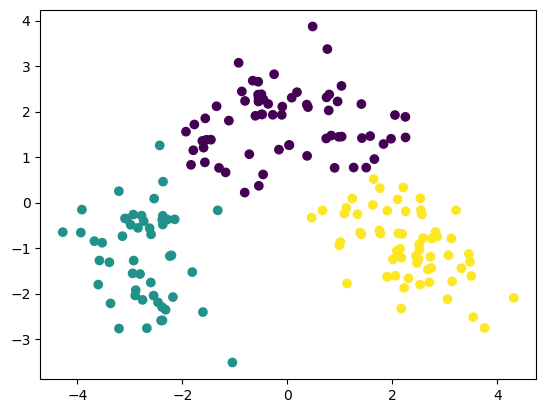

In [33]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=pred)
plt.show()

In [35]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns = ['PCA1','PCA2'])
X_pca

,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [36]:
# Apply K-Means to PCA-transformed data
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
labels_pca = kmeans_pca.fit_predict(X_pca)
X_pca['Labels'] = labels_pca
X_pca.head()

,PCA1,PCA2,Labels
0,3.316751,-1.443463,2
1,2.209465,0.333393,2
2,2.516740,-1.031151,2
3,3.757066,-2.756372,2
4,1.008908,-0.869831,2


In [37]:
# Silhouette score 
sil_pca = silhouette_score(X_pca, labels_pca)
print("Silhouette Score:", np.round(sil_pca,2))

Silhouette Score: 0.61


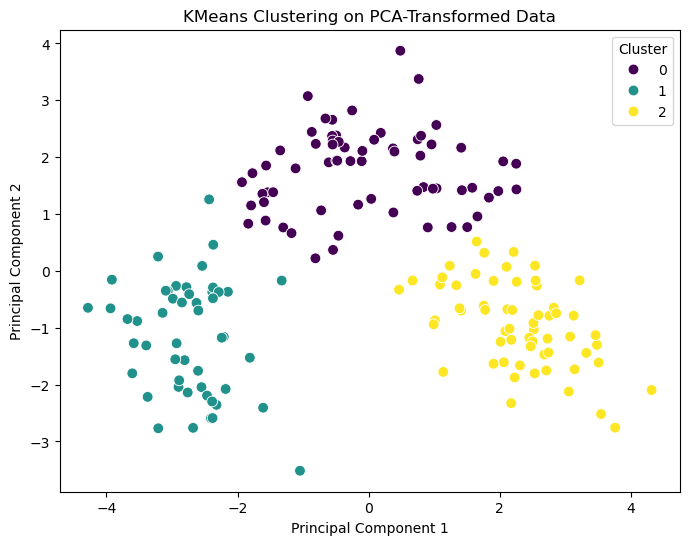

In [38]:
#Visualization of PCA-based clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data = X_pca, x='PCA1', y='PCA2', hue='Labels', palette = 'viridis', s = 60)
#plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.title('KMeans Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [39]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

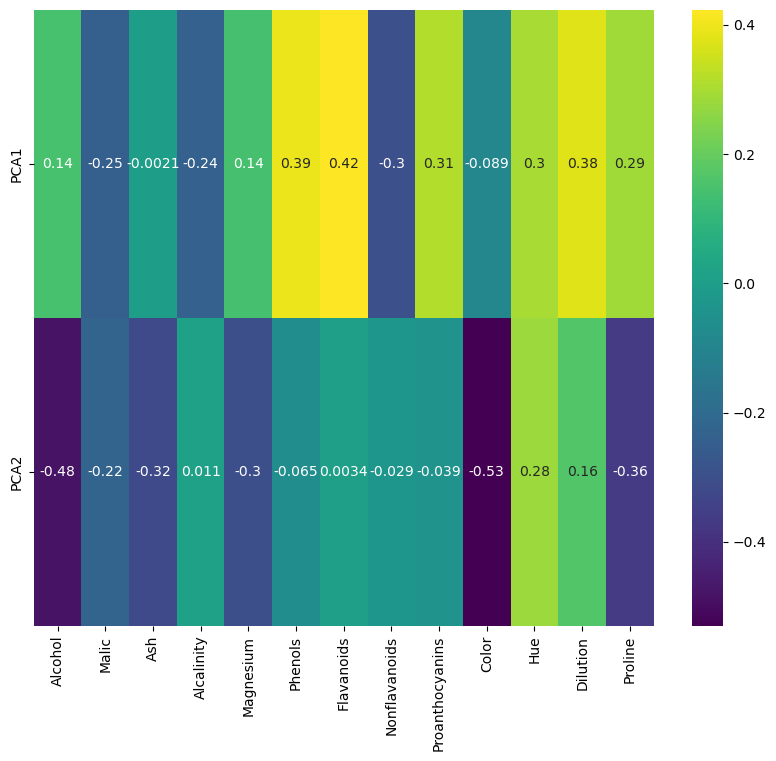

In [40]:
# Represent the effect Features on PCA components.
component_df = pd.DataFrame(pca.components_, index = ['PCA1',"PCA2"], columns = X_scaled.columns)
# Heat map
plt.figure(figsize = (10,8))
sns.heatmap(component_df, annot = True, cmap = 'viridis')
plt.show()

##### Upon analysis, almost closer Silhouette scores are obtained when clustering with all variables and clustering with just 2 PCA components, thus reducing complexity to a great extent.

#### 
Impacts of dimensionality reduction on clustering performance:

Noise Reduction

Reduced Overfitting

Computational Efficiency

Improved Distance Metrics

Better Visualization

#### Trade-offs between using PCA and clustering directly on the original dataset:

1)Loss of Information:

PCA may discard dimensions with low variance, which could still hold critical information for clustering.

2)Transformation Bias:

Principal components are linear combinations of original features, which can distort the original feature relationships or make clusters less interpretable.

3)Local Structures:

PCA emphasizes global variance and may miss local patterns or structures crucial for certain clustering methods (e.g., DBSCAN).

4)Dependence on Variance:
                    
PCA assumes that the most important information is in high-variance components, which may not always be true for clustering tasks.

#### Practical Implications of Using PCA and Clustering:

Dimensionality Reduction

Noise and Redundancy Reduction

Feature Transformation

Trade-off Between Interpretability and Simplicity

#### Applications:

Customer segmentation: Reduce customer attributes to principal components before applying clustering.

Gene expression analysis: Simplify datasets with thousands of gene measurements.

Image processing: Reduce pixel data for tasks like object detection.

#### Recommendations for when to use each technique based on the analysis conducted:

1. When to Use PCA Before Clustering
High Dimensionality:

Correlated Features:

Noise in Data:

Computational Constraints:

2. When to Use Normal Clustering (Without PCA)
Low Dimensionality:

Interpretability is Critical:

Distinct and Well-Structured Data:

Local Structures are Important:

Features are Already Preprocessed: